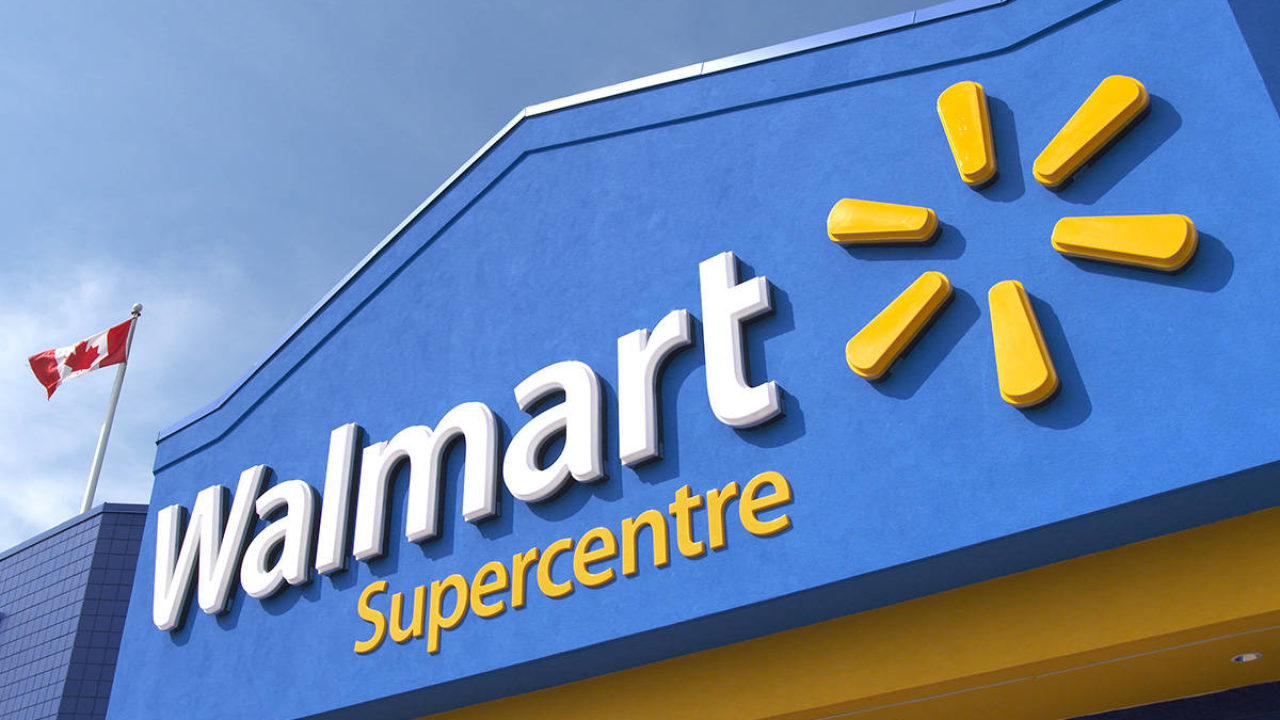

### Description:
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

### Acknowledgements
The dataset is taken from Kaggle.

### Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t single & multiple features.
Also evaluate the models & compare their respective scores like R2, RMSE, etc.

#### About this file

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate
- Holiday Events<br /> Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br /> Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br /> Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br /> Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [1]:
# Imoprt Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset.
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
print("Features datatypes: \n", df.dtypes, sep="")

Features datatypes: 
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
df['Weekday'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [6]:
df.drop(columns='Date', inplace=True)
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Year
0,1,1643690.9,0,42.31,2.572,211.096358,8.106,4,2,2010


In [7]:
print(f'Data Shape: {df.shape}')

Data Shape: (6435, 10)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Weekday       6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01
Weekday,6435.0,4.000000e+00,0.000000,4.000,4.000,4.000000,4.000000e+00,4.000000e+00
Month,6435.0,6.447552e+00,3.238308,1.000,4.000,6.000000,9.000000e+00,1.200000e+01
Year,6435.0,2.010965e+03,0.797019,2010.000,2010.000,2011.000000,2.012000e+03,2.012000e+03


In [10]:
print("Features names: \n", list(df.columns), sep="")

Features names: 
['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekday', 'Month', 'Year']


In [11]:
# Checking Null values.
df.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekday         0
Month           0
Year            0
dtype: int64

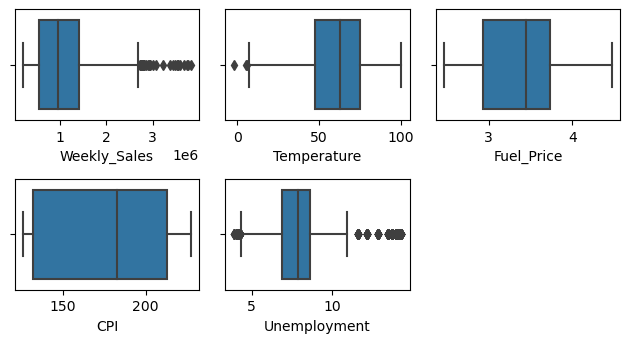

In [12]:
# Checking Outliers
cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
t = 1
for col in cols:
    plt.subplot(3, 3, t)
    sns.boxplot(x=df[col])
    t = t + 1
plt.tight_layout()
plt.show()


In [13]:
df.duplicated().sum()

0

### Univariate Analysis.

In [14]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Weekday', 'Month', 'Year'],
      dtype='object')

<Axes: ylabel='Density'>

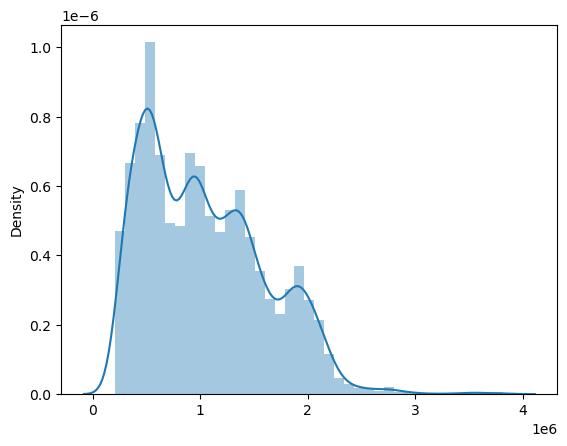

In [15]:
sns.distplot(x=df['Weekly_Sales'])

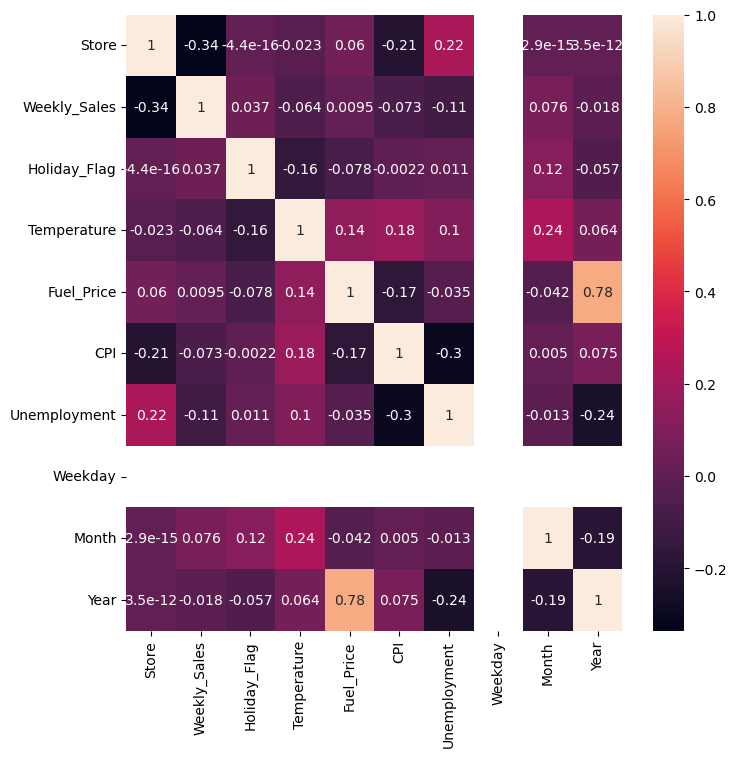

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: ylabel='Weekly_Sales'>

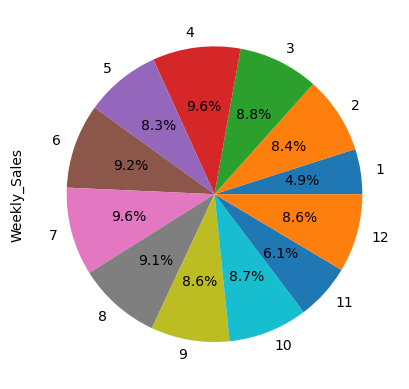

In [17]:
df.groupby('Month')['Weekly_Sales'].sum().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='Weekly_Sales'>

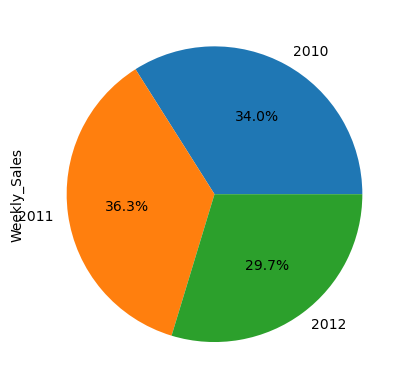

In [18]:
df.groupby('Year')['Weekly_Sales'].sum().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='Weekly_Sales'>

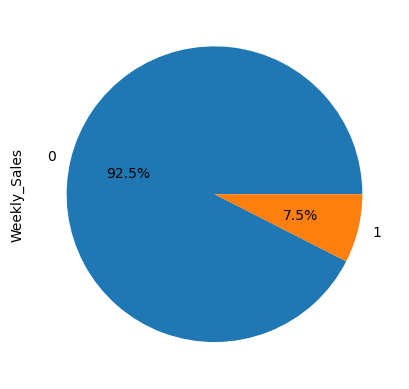

In [19]:
df.groupby('Holiday_Flag')['Weekly_Sales'].sum().plot(kind='pie', autopct='%1.1f%%')

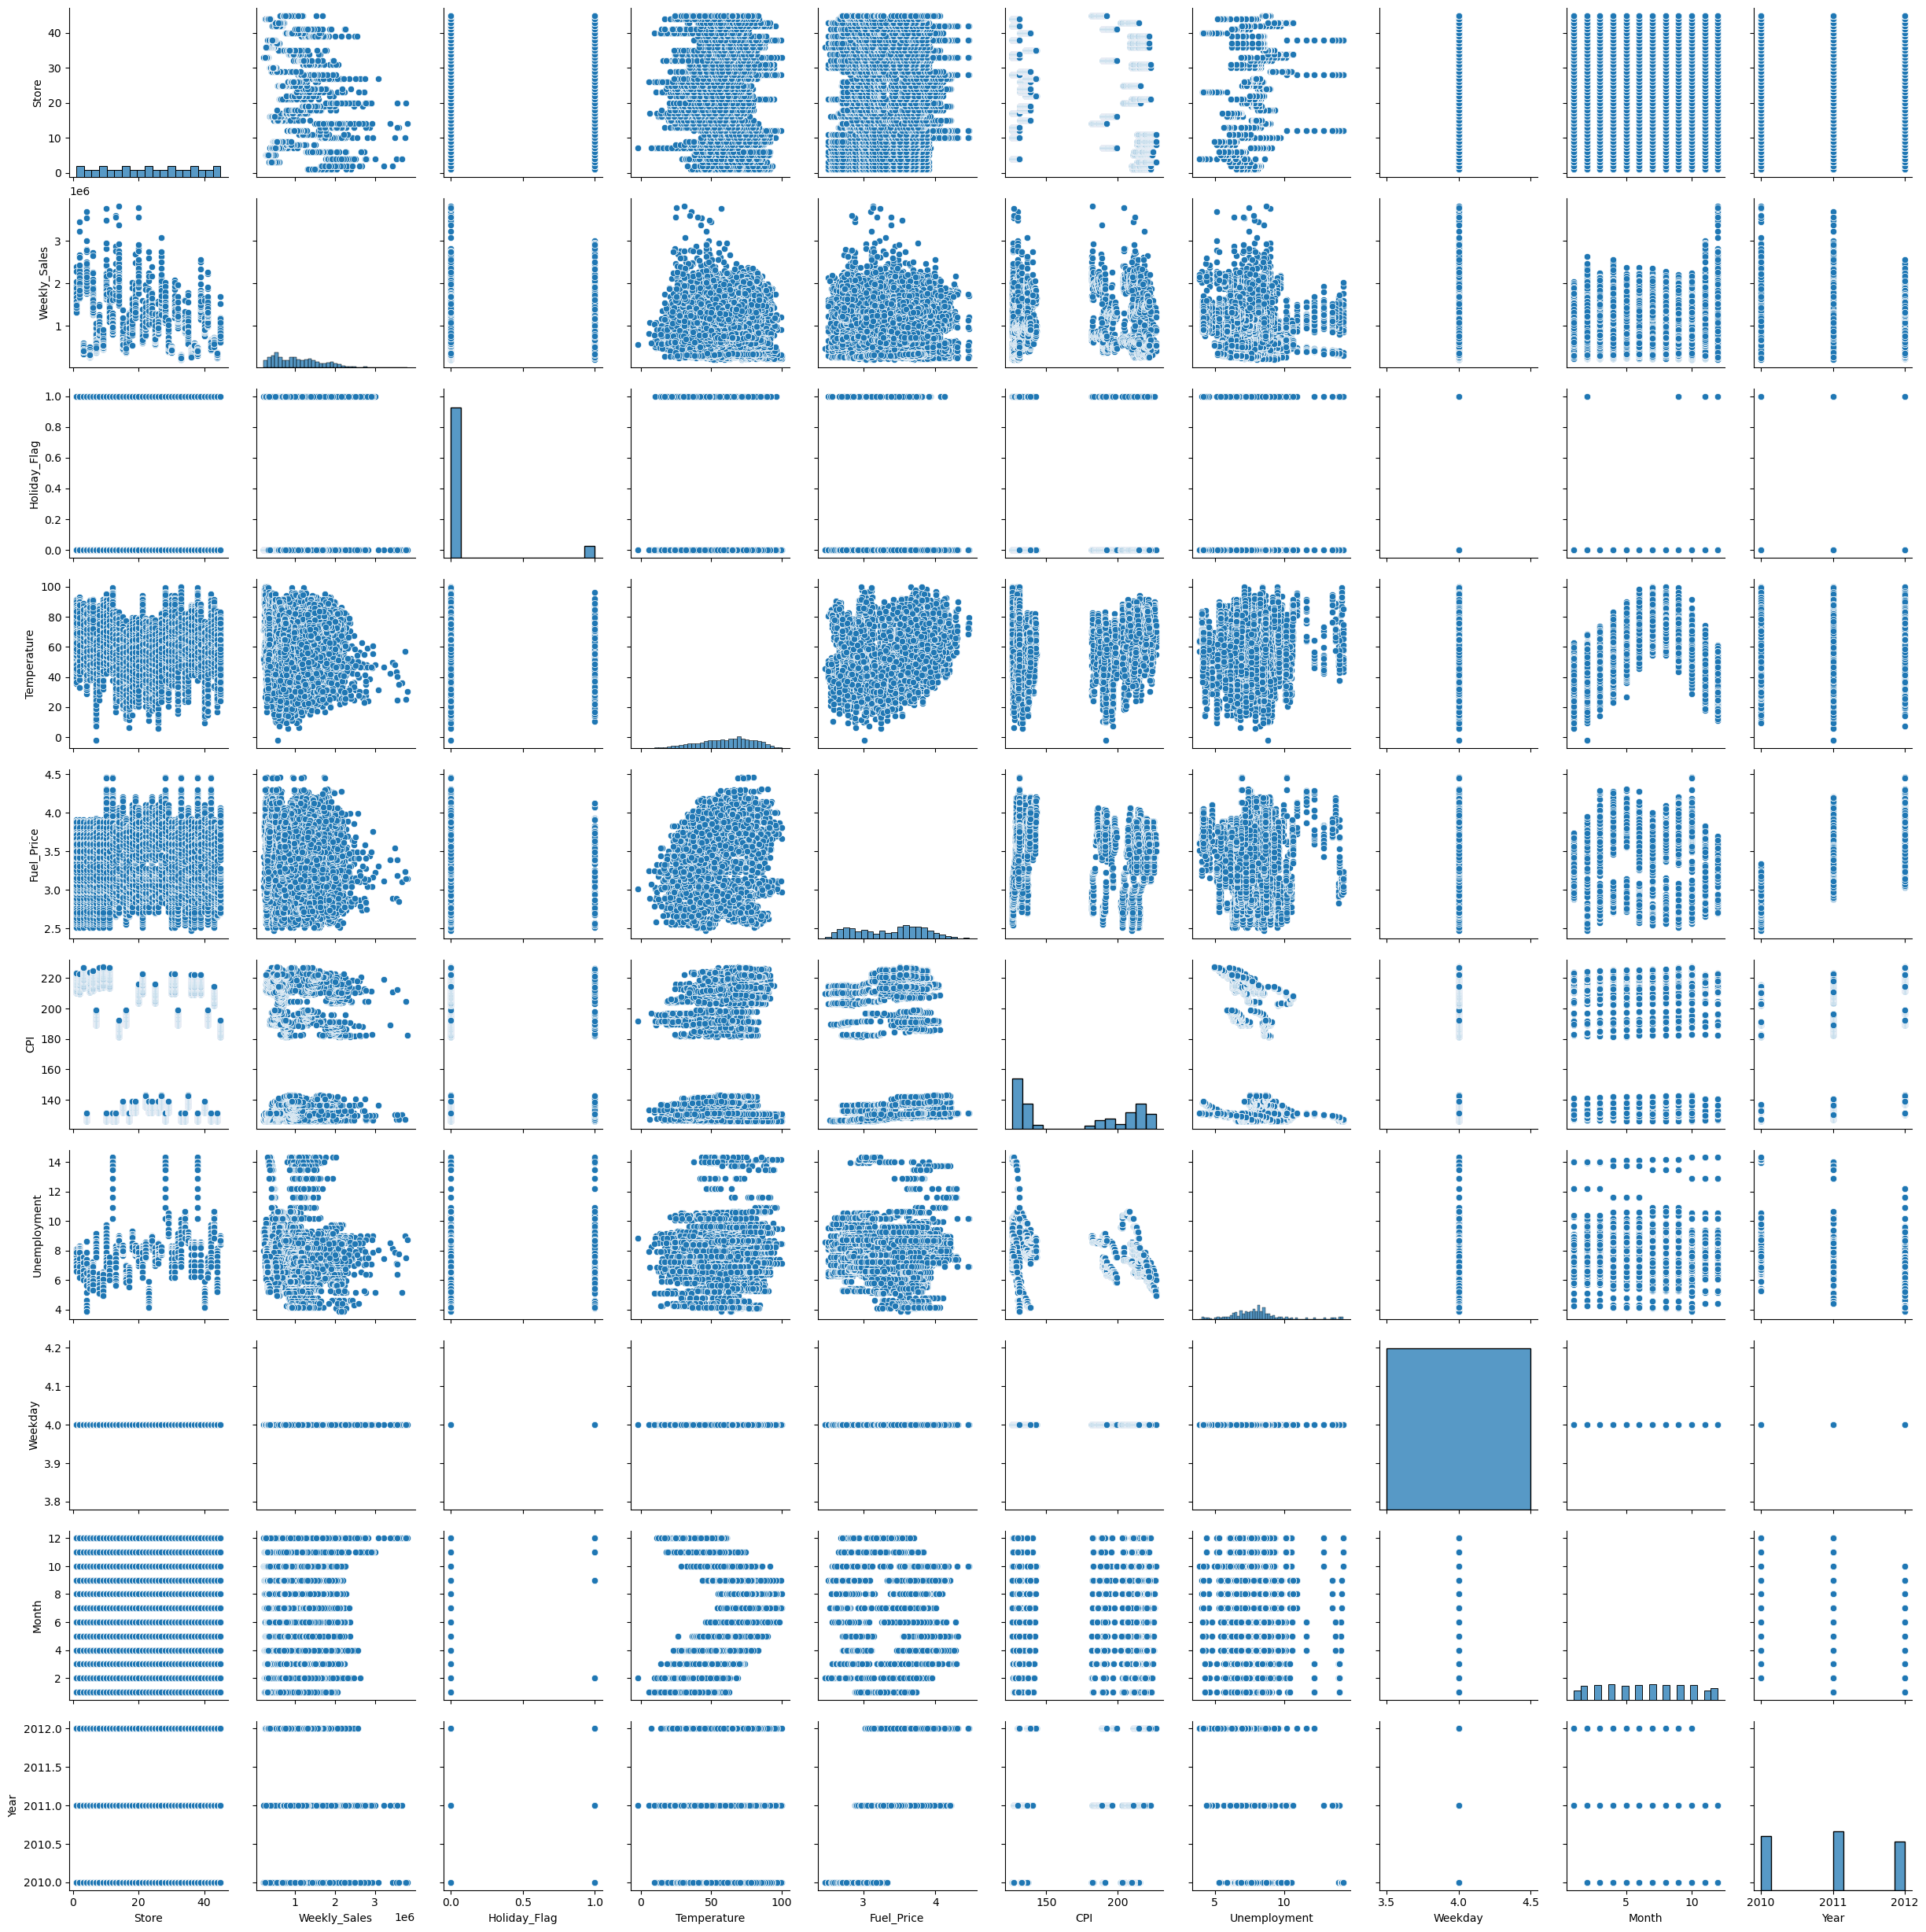

In [20]:
sns.pairplot(df)

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=10)

print("Xtrain Shape", xtrain.shape)
print("Ytrain Shape", ytrain.shape)
print("Xtest Shape", xtest.shape)
print("Ytest Shape", ytest.shape)

Xtrain Shape (4504, 9)
Ytrain Shape (4504,)
Xtest Shape (1931, 9)
Ytest Shape (1931,)


In [22]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
xtrain_scaled = SS.fit_transform(xtrain)
xtest_scaled = SS.transform(xtest)

In [23]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(xtrain_scaled, ytrain)

LinearRegression()

In [24]:
train_ypred = LR.predict(xtrain_scaled)
test_ypred = LR.predict(xtest_scaled)

In [25]:
from sklearn.metrics import mean_absolute_error as mse
print("Train RMSE:",np.sqrt(mse(ytrain, train_ypred)))
print("Test RMSE:",np.sqrt(mse(ytest, test_ypred)))

from sklearn.metrics import r2_score 
print("Train R2_Score:",r2_score(ytrain, train_ypred))
print("Test R2_Score:",r2_score(ytest, test_ypred))

from sklearn.metrics import mean_absolute_percentage_error as mape 
print("Train MAPE:",mape(ytrain, train_ypred))
print("Test MAPE:",mape(ytest, test_ypred))

Train RMSE: 654.3595253086573
Test RMSE: 658.398041556684
Train R2_Score: 0.14565843542502344
Test R2_Score: 0.1541736796737061
Train MAPE: 0.6102380929763378
Test MAPE: 0.5953509077439249


In [26]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(xtrain_scaled, ytrain)

DecisionTreeRegressor()

In [27]:
train_ypred = DT.predict(xtrain_scaled)
test_ypred = DT.predict(xtest_scaled)

In [28]:
print("Train RMSE:",np.sqrt(mse(ytrain, train_ypred)))
print("Test RMSE:",np.sqrt(mse(ytest, test_ypred)))
print("Train R2_Score:",r2_score(ytrain, train_ypred))
print("Test R2_Score:",r2_score(ytest, test_ypred))
print("Train MAPE:",mape(ytrain, train_ypred))
print("Test MAPE:",mape(ytest, test_ypred))

Train RMSE: 0.0
Test RMSE: 292.79376253533144
Train R2_Score: 1.0
Test R2_Score: 0.9187032456049214
Train MAPE: 0.0
Test MAPE: 0.07667857016672236


In [29]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(xtrain_scaled, ytrain)

KNeighborsRegressor()

In [30]:
train_ypred = KNN.predict(xtrain_scaled)
test_ypred = KNN.predict(xtest_scaled)

In [31]:
print("Train RMSE:",np.sqrt(mse(ytrain, train_ypred)))
print("Test RMSE:",np.sqrt(mse(ytest, test_ypred)))
print("Train R2_Score:",r2_score(ytrain, train_ypred))
print("Test R2_Score:",r2_score(ytest, test_ypred))
print("Train MAPE:",mape(ytrain, train_ypred))
print("Test MAPE:",mape(ytest, test_ypred))

Train RMSE: 442.21487100765813
Test RMSE: 511.5296769087435
Train R2_Score: 0.7166574883231818
Test R2_Score: 0.5498143688506486
Train MAPE: 0.25288611235729186
Test MAPE: 0.32165725887151797


In [32]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(xtrain_scaled, ytrain)

RandomForestRegressor()

In [33]:
train_ypred = RF.predict(xtrain_scaled)
test_ypred = RF.predict(xtest_scaled)

In [34]:
print("Train RMSE:",np.sqrt(mse(ytrain, train_ypred)))
print("Test RMSE:",np.sqrt(mse(ytest, test_ypred)))
print("Train R2_Score:",r2_score(ytrain, train_ypred))
print("Test R2_Score:",r2_score(ytest, test_ypred))
print("Train MAPE:",mape(ytrain, train_ypred))
print("Test MAPE:",mape(ytest, test_ypred))

Train RMSE: 160.17270363166352
Test RMSE: 272.1711257081447
Train R2_Score: 0.9922782996054581
Test R2_Score: 0.9368861442285868
Train MAPE: 0.02372372284356218
Test MAPE: 0.06483413287663611


In [35]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(xtrain_scaled, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
train_ypred = xgb.predict(xtrain_scaled)
test_ypred = xgb.predict(xtest_scaled)

In [37]:
print("Train RMSE:",np.sqrt(mse(ytrain, train_ypred)))
print("Test RMSE:",np.sqrt(mse(ytest, test_ypred)))
print("Train R2_Score:",r2_score(ytrain, train_ypred))
print("Test R2_Score:",r2_score(ytest, test_ypred))
print("Train MAPE:",mape(ytrain, train_ypred))
print("Test MAPE:",mape(ytest, test_ypred))

Train RMSE: 165.76289779756374
Test RMSE: 250.73972429408352
Train R2_Score: 0.9948971797805516
Test R2_Score: 0.9616678180762157
Train MAPE: 0.0297665136096409
Test MAPE: 0.06049915785124053


In [44]:
# Hyper Tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain_scaled, ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [45]:
grid_search.best_params_, grid_search.best_score_

({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300},
 0.9621315809553426)

In [58]:
xgb_final = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=300)
xgb_final.fit(xtrain_scaled, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
train_ypred = xgb_final.predict(xtrain_scaled)
test_ypred = xgb_final.predict(xtest_scaled)

In [65]:
print("Train RMSE:",np.sqrt(mse(ytrain, train_ypred)))
print("Test RMSE:",np.sqrt(mse(ytest, test_ypred)))
print("Train R2_Score:",r2_score(ytrain, train_ypred))
print("Test R2_Score:",r2_score(ytest, test_ypred))
print("Train MAPE:",mape(ytrain, train_ypred))
print("Test MAPE:",mape(ytest, test_ypred))

Train RMSE: 193.90108447472394
Test RMSE: 250.19570887315837
Train R2_Score: 0.9901265480220031
Test R2_Score: 0.9630681200287541
Train MAPE: 0.04038675576195106
Test MAPE: 0.06002422470248512


Overall, these R2 scores suggest that the regression model is performing very well, both on the training and test datasets. A high R2 score indicates that the model captures a large portion of the variance in the target variable and makes accurate predictions. 